In [1]:
import sys
import torch
sys.path.append('../')

In [121]:
from models.ConvLSTM import get_convlstm_model
from models.AR_LSTM import AR_LSTM
from models.PredRNNPP import PredRNNPP
from models.ResNet import resnet12
from models.UNet import UNet

In [145]:
num_input_frames=5
num_output_frames=20
batch_size=2
device='cpu'
reinsert_frequency=10
model =  get_convlstm_model(num_input_frames, num_output_frames, batch_size, device, dilation=2, padding=2)

In [146]:
inp=torch.ones(2,5,128,128).numpy()
inp.shape[2:]

(128, 128)

In [147]:
import numpy as np
# np.ones(inp.shape[2:]) * 0.5

In [148]:
# torch.ones(inp.size()[2:]).size()

In [160]:
model =  get_convlstm_model(3, 5, 16, device, dilation=1, padding=1)

In [163]:
params = sum([np.prod(p.size()) for p in model.parameters() if p.requires_grad])
params

12319529

In [159]:
model = AR_LSTM(num_input_frames, num_output_frames, reinsert_frequency, device)
params = sum([np.prod(p.size()) for p in model.parameters() if p.requires_grad])
print('lstm\t',params)
model = get_convlstm_model(num_input_frames, num_output_frames, batch_size, device, dilation=1, padding=1)
params = sum([np.prod(p.size()) for p in model.parameters() if p.requires_grad])
print('clstm\t',params)
model = PredRNNPP(num_input_frames, num_output_frames, device, use_GHU=False)
params = sum([np.prod(p.size()) for p in model.parameters() if p.requires_grad])
print('predrnn\t',params)
model = resnet12(num_input_frames, num_output_frames, replace_stride_with_dilation=[1,2,4])
params = sum([np.prod(p.size()) for p in model.parameters() if p.requires_grad])
print('resnet\t',params)
model = UNet(num_input_frames, num_output_frames)
params = sum([np.prod(p.size()) for p in model.parameters() if p.requires_grad])
print('unet\t',params)

lstm	 88236521
clstm	 12319529
predrnn	 2469265
resnet	 759616
unet	 7785300


In [130]:
from models.ConvLSTM import get_convlstm_model
modelCL = get_convlstm_model(5, 10, 2, 'cpu')
# summary(modelCL, (10,128,128), batch_size=16, device='cpu')

In [131]:
from torchsummary import summary

In [132]:
class argsclass():
    pass
args = argsclass()

In [133]:
from utils.experiment import create_new_datasets, get_normalizer
from torch.utils.data import DataLoader

data_directory = '/Users/stathis/Code/thesis/wave_propagation/data/Training_Data/'
normalizer = get_normalizer('normal')
datasets = create_new_datasets(data_directory, normalizer, back_and_forth=True)

Creating new datasets


In [134]:
dataloader = DataLoader(datasets['Training data'], batch_size=1, shuffle=True, num_workers=1)

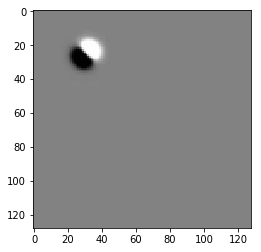

In [135]:
import matplotlib.pyplot as ply

batch = next(iter(dataloader))
plt.imshow(batch[0,0,:,:], cmap='gray')
plt.show()

In [136]:
import sys
sys.path.append('..')
sys.path.append('../..')
import logging
import torch
import os
import matplotlib.pyplot as plt
from models.ConvLSTM import get_convlstm_model
from utils.experiment import Experiment
from utils.arg_extract import get_args
plt.ioff()

logging.basicConfig(format='%(message)s', level=logging.INFO)

# args = get_args_test()
args.experiment_name='dummy' 
args.num_workers = 1
args.batch_size=1
args.normalizer_type='normal'
args.test_starting_point=15
args.show_plots=True
args.debug=True
args.num_epochs = 100
args.dataset='original'
args.belated=False

experiment = Experiment(args)
experiment.create_new()

Experiment dummy
use CPU


TypeError: argument of type 'argsclass' is not iterable

NameError: name 'experiment' is not defined

In [13]:
batch = next(iter(experiment.dataloaders['train']))sac

NameError: name 'experiment' is not defined

In [74]:
batch.size()

torch.Size([1, 100, 128, 128])

In [77]:
from utils.helper_functions import convert_BSHW_to_SBCHW, convert_SBCHW_to_BSHW

In [80]:
experiment.model.encoder(convert_BSHW_to_SBCHW(batch))[0][0].size()

new forward
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
new forward
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
new forward
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])


torch.Size([1, 64, 64, 64])

In [91]:
experiment.model(batch).size()

new forward
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
new forward
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
new forward
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
new forward
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output: 

torch.Size([1, 10, 128, 128])

In [92]:
experiment.model.get_future_frames(batch, 15).size()

new forward
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
new forward
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
new forward
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
new forward
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output: 

torch.Size([1, 15, 128, 128])

In [82]:
from models.AR_ConvLSTM import get_ar_convlstm_model

In [83]:
ar_model = get_ar_convlstm_model(5, 10, 1, 'cpu')

In [93]:
ar_model(batch).size()

new forward
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
new forward
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
new forward
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
new forward
convlstm output:  torch.Size([1, 192, 16, 16])
new forward
convlstm output:  torch.Size([1, 192, 32, 32])
new forward
convlstm output:  torch.Size([1, 64, 64, 64])


torch.Size([1, 1, 128, 128])

In [95]:
ar_model.get_future_frames(batch, 15).size()

new forward
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
new forward
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
new forward
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
new forward
convlstm output:  torch.Size([1, 192, 16, 16])
new forward
convlstm output:  torch.Size([1, 192, 32, 32])
new forward
convlstm output:  torch.Size([1, 64, 64, 64])
CONVLSTM OUTPUT FRAMES SIZE torch.Size([1, 1, 128, 128])
new forward
convlstm output:  t

convlstm output:  torch.Size([1, 192, 32, 32])
new forward
convlstm output:  torch.Size([1, 64, 64, 64])
CONVLSTM OUTPUT FRAMES SIZE torch.Size([1, 9, 128, 128])
new forward
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
convlstm output:  torch.Size([1, 64, 64, 64])
new forward
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
convlstm output:  torch.Size([1, 192, 32, 32])
new forward
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
convlstm output:  torch.Size([1, 192, 16, 16])
new forward
convlstm output:  torch.Size([1, 192, 16, 16])
new forward
convlstm output:  torch.Size([1

torch.Size([1, 15, 128, 128])